## Imports

In [1]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error as MSE

/Users/vicky/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/vicky/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Reading and preparing the df

In [2]:
horsey = pd.read_csv('finalmerged_clean').drop('Unnamed: 0', axis=1)

#### Smaller data set (maiden females)

In [3]:
MaidenFems = horsey.iloc[42:49]
MaidenFems

,Horse Name,Final_Time,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
42,Dhafeera,1:40.25,10025,1,0,2,5,0,0.400000,10,374.000000,494.000000,616.800000
43,Jazaalah,1:40.46,10046,1,0,0,4,2,0.500000,10,385.000000,481.000000,620.333333
44,Meal Ticket,1:40.58,10058,1,0,2,6,0,0.333333,37,370.000000,499.571429,620.166667
45,You Missed It,1:40.84,10084,1,0,5,7,1,0.857143,41,366.333333,492.363636,614.545455
46,Blossom Trail Miss,1:40.89,10089,1,0,0,3,1,0.333333,51,378.666667,500.923077,630.500000
47,Chalky,1:40.99,10099,1,0,2,5,1,0.600000,20,376.000000,504.500000,626.571429
48,Beauty Divine,1:41.75,10175,1,0,0,3,0,0.000000,27,389.333333,515.333333,624.000000


#### Larger data set (without maiden females)

In [4]:
horse_fast = horsey.drop(horsey.index[42:49])
horse_fast

,Horse Name,Final_Time,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
0,Blame the Rider,1:35.11,9511,0,0,0,5,1,0.200000,28,366.500000,490.000000,614.909091
1,Majestic Eagle,1:35.25,9525,0,0,2,4,0,0.500000,35,386.666667,506.714286,622.666667
2,Sellwood,1:35.39,9539,0,0,1,2,1,1.000000,28,365.333333,488.666667,619.333333
3,Cajun Treasure,1:35.39,9539,0,0,0,0,0,0.000000,18,366.500000,496.571429,618.000000
4,Friendly Outthedor,1:35.69,9569,0,0,1,4,0,0.250000,46,373.142857,493.666667,611.500000
5,Pointed,1:35.79,9579,0,0,0,5,0,0.000000,29,367.500000,490.750000,612.769231
6,Dignitaire,1:36.25,9625,0,0,0,3,1,0.333333,32,376.400000,498.571429,623.333333
7,Papa Joe,1:36.71,9671,0,0,0,1,0,0.000000,15,382.666667,503.111111,634.000000
8,Tule Fog,1:34.19,9419,0,1,1,6,1,0.500000,34,381.750000,492.333333,614.727273
9,Lymebyrd,1:34.83,9483,0,2,3,15,1,0.400000,44,369.000000,491.176471,608.421053


In [9]:
#Shuffling the sample so the horses aren't ordered by race. 
horse_fast_shuf = horse_fast.sample(frac = 1)
horse_fast_shuf

,Horse Name,Final_Time,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
26,Avalanche,1:34.47,9447,0,1,1,7,1,0.428571,52,368.400000,491.000000,615.181818
12,Raven Creek,1:35.54,9554,0,1,4,8,2,0.875000,34,369.000000,488.833333,609.222222
1,Majestic Eagle,1:35.25,9525,0,0,2,4,0,0.500000,35,386.666667,506.714286,622.666667
18,Air Vice Marshal,1:34.12,9412,0,2,5,14,2,0.642857,38,369.400000,488.538462,616.066667
36,Madame Stripes,1:34.68,9468,1,4,7,18,2,0.722222,66,371.142857,493.473684,624.666667
49,Subic Bay,1:35.18,9518,1,1,3,9,1,0.555556,37,374.500000,501.818182,615.285714
0,Blame the Rider,1:35.11,9511,0,0,0,5,1,0.200000,28,366.500000,490.000000,614.909091
16,Aquaphobia,1:33.86,9386,0,5,3,15,2,0.666667,47,385.000000,496.652174,618.421053
30,Tartini,1:35.06,9506,0,1,1,8,1,0.375000,10,362.000000,490.400000,623.500000
8,Tule Fog,1:34.19,9419,0,1,1,6,1,0.500000,34,381.750000,492.333333,614.727273


In [10]:
horse_fast_shuf = horse_fast_shuf.drop('Final_Time',1).drop('Horse Name',1)
horse_fast_shuf

,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
26,9447,0,1,1,7,1,0.428571,52,368.400000,491.000000,615.181818
12,9554,0,1,4,8,2,0.875000,34,369.000000,488.833333,609.222222
1,9525,0,0,2,4,0,0.500000,35,386.666667,506.714286,622.666667
18,9412,0,2,5,14,2,0.642857,38,369.400000,488.538462,616.066667
36,9468,1,4,7,18,2,0.722222,66,371.142857,493.473684,624.666667
49,9518,1,1,3,9,1,0.555556,37,374.500000,501.818182,615.285714
0,9511,0,0,0,5,1,0.200000,28,366.500000,490.000000,614.909091
16,9386,0,5,3,15,2,0.666667,47,385.000000,496.652174,618.421053
30,9506,0,1,1,8,1,0.375000,10,362.000000,490.400000,623.500000
8,9419,0,1,1,6,1,0.500000,34,381.750000,492.333333,614.727273


## Splitting into Test-Train

In [17]:
y = horse_fast_shuf['Final_Time_Hund']    #extract dependent variable
X = horse_fast_shuf.drop('Final_Time_Hund',1) # Get rid of ind. variables

** This is the sacred split! Run carefully! **

In [18]:
## Splitting data into train and test
X_ttrain, X_ttest, y_ttrain, y_ttest = train_test_split(X,y, test_size=0.2)

In [197]:
X_ttest

,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
7,0,0,0,1,0,0.000000,15,382.666667,503.111111,634.000000
1,0,0,2,4,0,0.500000,35,386.666667,506.714286,622.666667
11,0,1,0,2,0,0.500000,47,373.500000,495.250000,617.285714
56,1,1,0,2,0,0.500000,39,372.600000,495.000000,615.833333
22,0,2,0,10,4,0.600000,33,374.000000,500.307692,616.428571
24,0,4,3,20,3,0.500000,38,376.000000,488.666667,611.600000
17,0,3,1,4,0,1.000000,22,377.600000,490.666667,617.333333
8,0,1,1,6,1,0.500000,34,381.750000,492.333333,614.727273
14,0,1,0,6,0,0.166667,31,368.000000,487.000000,616.142857
20,0,3,4,16,1,0.500000,54,378.200000,493.866667,609.214286


## Linear Regression

## Model A - Elastic Net (no frills)

In [196]:
X_ttest

,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
7,0,0,0,1,0,0.000000,15,382.666667,503.111111,634.000000
1,0,0,2,4,0,0.500000,35,386.666667,506.714286,622.666667
11,0,1,0,2,0,0.500000,47,373.500000,495.250000,617.285714
56,1,1,0,2,0,0.500000,39,372.600000,495.000000,615.833333
22,0,2,0,10,4,0.600000,33,374.000000,500.307692,616.428571
24,0,4,3,20,3,0.500000,38,376.000000,488.666667,611.600000
17,0,3,1,4,0,1.000000,22,377.600000,490.666667,617.333333
8,0,1,1,6,1,0.500000,34,381.750000,492.333333,614.727273
14,0,1,0,6,0,0.166667,31,368.000000,487.000000,616.142857
20,0,3,4,16,1,0.500000,54,378.200000,493.866667,609.214286


In [79]:
## Establishing x and y

XA = X_ttrain
yA = y_ttrain

In [80]:
XA = XA.reset_index(drop=True)
yA = yA.reset_index(drop=True)


In [194]:
#Checking the predictability of the model with this alpha = 1
modelA = ElasticNet(1, l1_ratio=.5)
fit = modelA.fit(XA, yA)
rsq = fit.score(XA, yA)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

print(rsq)
print(adj_rsq)

0.2976110555152557
0.05540797121017138


** 0.2976 **  not great... but not terrible. 29% of the variance is explained by the model. 

In [111]:
#Let's see if I play around with the ratios of L1 and L2

modelA = ElasticNet(1, l1_ratio=.2)
fit = modelA.fit(XA, yA)
rsq = fit.score(XA, yA)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

print(rsq)
print(adj_rsq)

0.2809750059798638
0.03303535286947201


** Looks slightly worse. I guess there wasn't much need to compress complexity, or fix colinearity. **

In [115]:
#Let's check it in the other direction, with L1 getting more weight.

modelA = ElasticNet(1, l1_ratio=.98)
fit = modelA.fit(XA, yA)
rsq = fit.score(XA, yA)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

print(rsq)
print(adj_rsq)


0.34113056637790645
0.11393420995649495


** Seems like l1 of 0.98 really takes the cake! Let's check out alpha... **

In [130]:
#Let's see if we can find a better alpha...

kf = KFold(n_splits=5, shuffle = True, random_state = 40 )

alphas = [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000, 100000, 1000000]
#alphas = [0,.001,.01,.1,.2,.5,.9,1,5,10,50,100,1000,10000]
errors = []
for i in alphas:
   err_list = []
   for train_index, test_index in kf.split(XA):
       #print("TRAIN:", train_index, "TEST:", test_index) #This gives the index of the rows you're training and testing. 
       XA_train, XA_test = XA.loc[train_index], XA.loc[test_index]
       yA_train, yA_test = yA[train_index], yA[test_index]
 
       ef = ElasticNet(i, l1_ratio = 0.5)
       ef.fit(XA_train,yA_train)
       #print(ef.coef_) #This prints the coefficients of each of the input variables. 
       preds = ef.predict(XA_test) #Predictions for the y value. 
       error = np.sqrt(MSE(preds,yA_test))
       err_list.append(error)
       
   error = np.mean(err_list)
   errors.append(error)
   print("The RMSE for alpha = {0} is {1}".format(i,error))

The RMSE for alpha = 1e-09 is 129.53130618552137
The RMSE for alpha = 1e-08 is 129.53130230557252
The RMSE for alpha = 1e-07 is 129.5312635063381
The RMSE for alpha = 1e-06 is 129.5308755384337
The RMSE for alpha = 1e-05 is 129.52699839222413
The RMSE for alpha = 0.0001 is 129.48847832822554
The RMSE for alpha = 0.001 is 129.12683940740465
The RMSE for alpha = 0.01 is 126.90540391552922
The RMSE for alpha = 0.1 is 122.34702379312814
The RMSE for alpha = 1 is 111.38977980098949
The RMSE for alpha = 10 is 97.32368654937686
The RMSE for alpha = 100 is 90.7335843831616
The RMSE for alpha = 1000 is 92.04319083455303
The RMSE for alpha = 10000 is 92.04319083455303
The RMSE for alpha = 100000 is 92.04319083455303
The RMSE for alpha = 1000000 is 92.04319083455303


** Looks like the best alpha is around 100! Lets see if we can get even more granular. **

In [132]:
kf = KFold(n_splits=5, shuffle = True, random_state = 40)

alphas = [80, 85, 90, 95, 100, 150, 200, 250, 300]
#alphas = [0,.001,.01,.1,.2,.5,.9,1,5,10,50,100,1000,10000]
errors = []
for i in alphas:
   err_list = []
   for train_index, test_index in kf.split(XA):
       #print("TRAIN:", train_index, "TEST:", test_index) #This gives the index of the rows you're training and testing. 
       XA_train, XA_test = XA.loc[train_index], XA.loc[test_index]
       yA_train, yA_test = yA[train_index], yA[test_index]
 
       ef = ElasticNet(i)
       ef.fit(XA_train,yA_train)
       #print(ef.coef_) #This prints the coefficients of each of the input variables. 
       preds = ef.predict(XA_test) #Predictions for the y value. 
       error = np.sqrt(MSE(preds,yA_test))
       err_list.append(error)
       
   error = np.mean(err_list)
   errors.append(error)
   print("The RMSE for alpha = {0} is {1}".format(i,error))

The RMSE for alpha = 80 is 90.68114271948096
The RMSE for alpha = 85 is 90.67975046754194
The RMSE for alpha = 90 is 90.68070200506327
The RMSE for alpha = 95 is 90.70240329358458
The RMSE for alpha = 100 is 90.73358438316163
The RMSE for alpha = 150 is 91.24441477289254
The RMSE for alpha = 200 is 91.70712518488537
The RMSE for alpha = 250 is 92.1371908074187
The RMSE for alpha = 300 is 92.21212944553594


** I'm going to settle on an alpha of 90 **

In [133]:
#Checking the predictability of the model again with the new alpha of 90. 
modelA = ElasticNet(alpha = 90)
fit = modelA.fit(XA, yA)
fit.score(XA, yA)

0.09128516039606038

In [134]:
#Checking the predictability of the model again with the new alpha l1 of .98
modelA = ElasticNet(l1_ratio = 0.98)
fit = modelA.fit(XA, yA)
fit.score(XA, yA)

0.34113056637790645

** Now let's do some tests **

In [135]:
#Testing the predictability of the model with this alpha = 0.5
XA_train, XA_test, yA_train, yA_test = train_test_split(XA, yA, test_size=0.2)

In [171]:
## Letting it do it's thing on it's own.
encvA = ElasticNetCV()
fitA = encvA.fit(XA_train, yA_train)


rsq = fitA.score(XA_test, yA_test)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

preds = fitA.predict(XA_test)
mserror = np.sqrt(MSE(yA_test,preds))
print(rsq)
print(adj_rsq)
print(preds)
print(mserror)
print(encvA.alpha_)
print(encvA.l1_ratio_)


-0.6791087003398619
-1.2581117004570554
[9542.86928567 9590.56166863 9540.45286305 9573.11363254 9509.34066419
 9558.96972908 9537.63035951 9545.51209758]
88.83453589081425
47.668359375000016
0.5


Well... that r^2 is super wacky... but the mean squared error seems good... 

** So... looks like the ElasticNetCV recommends an alpha of 47.6 and a split of 0.5 **

In [165]:
## L1 is 0.98

encvA2 = ElasticNetCV(l1_ratio = 0.98)
fitA2 = encvA2.fit(XA_train, yA_train)


rsq = fitA2.score(XA_test, yA_test)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

preds = fitA2.predict(XA_test)
mserror = np.sqrt(MSE(preds,yA_test))
print(rsq)
print(adj_rsq)
print(preds)
print(mserror)
print(encvA2.alpha_)
print(encvA2.l1_ratio_)



-0.29573046567217776
-0.7425340745246529
[9556.40625 9556.40625 9556.40625 9556.40625 9556.40625 9556.40625
 9556.40625 9556.40625]
78.03685652665989
243.20591517857133
0.98


Also... that r^2 is super wacky... but the mean squared error seems good... 

In [168]:
## Trying some alphas... 

encvA3 = ElasticNetCV(alphas = [80,90,100])
fitA3 = encvA3.fit(XA_train, yA_train)


rsq = fitA3.score(XA_test, yA_test)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

preds = fitA3.predict(XA_test)
mserror = np.sqrt(MSE(preds,yA_test))
print(rsq)
print(adj_rsq)
print(preds)
print(mserror)
print(encvA3.alpha_)
print(encvA3.l1_ratio_)

-0.527229082866683
-1.0538598010965736
[9546.84889681 9580.57447938 9544.88512295 9566.91819911 9517.23670569
 9558.73748473 9540.96516401 9549.62873959]
84.72167327717054
80
0.5


Not as good... 

In [ ]:
# Looking under the hood at the coefficients, this is with the alpha and L1 given from elasticCV. 

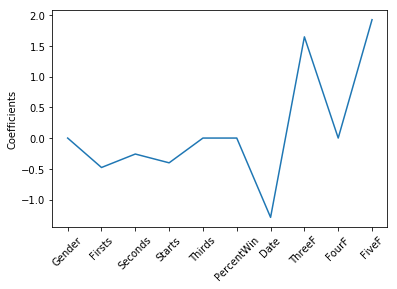

0.12380776411431815

In [170]:
elastic = ElasticNet(alpha=47 , l1_ratio=0.5)
elastic_coef = elastic.fit(XA, yA).coef_
_ = plt.plot(range(len(XA.columns)), elastic_coef)
_ = plt.xticks(range(len(XA.columns)), XA.columns, rotation=45)
_ = plt.ylabel('Coefficients')
plt.show()
elastic.score(XA,yA)

** Testing the predictability of the model on original T-T-S **

## Model B - Elastic Net (polynomial transformation)

In [193]:
## Establishing x and y

XB = X_ttrain
yB = y_ttrain

In [175]:
XB = XB.reset_index(drop=True)
yB = yB.reset_index(drop=True)

In [191]:
#Testing the predictability of the model with this alpha = 0.5
XB_train, XB_test, yB_train, yB_test = train_test_split(XB, yB, test_size=0.2)

In [192]:
modelB = make_pipeline(PolynomialFeatures(2), ElasticNetCV(l1_ratio = .5))
modelB.fit(XB_train, yB_train)
rsq = modelB.score(XB_test,yB_test)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

preds = fitA3.predict(XA_test)
mserror = np.sqrt(MSE(preds,yA_test))
print(rsq)
print(adj_rsq)
print(preds)
print(mserror)
print(modelB.named_steps.elasticnetcv.alpha_)
print(modelB.named_steps.elasticnetcv.l1_ratio_)

-0.03169248453131268
-0.3874485136800412
[9546.84889681 9580.57447938 9544.88512295 9566.91819911 9517.23670569
 9558.73748473 9540.96516401 9549.62873959]
84.72167327717054
382446.25754231465
0.5


/Users/vicky/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


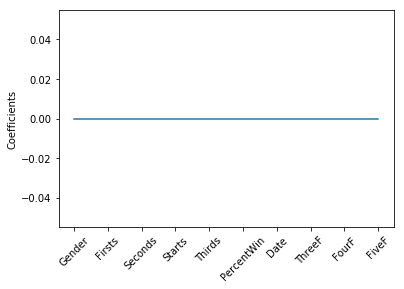

0.0

In [186]:
elastic = ElasticNet(alpha=293532 , l1_ratio=0.5)
elastic_coef = elastic.fit(XB, yB).coef_
_ = plt.plot(range(len(XB.columns)), elastic_coef)
_ = plt.xticks(range(len(XB.columns)), XB.columns, rotation=45)
_ = plt.ylabel('Coefficients')
plt.show()
elastic.score(XB,yB)

## Elastic Net CV with transformations